<h1>Fish 데이터 csv.reader로 읽어와서 확인하기</h1>

In [1]:
import pandas as pd
#os (운영체제) -> windows, macos, Linux
#예를 들어 사과 --> 기계어로 변환(이진수)
#windows11/10 -->사과 --> 001 ->cp949
#macOS, Linux -->사과 --> 0=100 -> utf-8
import csv
f = open("Fish.csv", 'r', encoding='cp949') 
data = csv.reader(f)

h = next(data)

perch_weight = []
perch_length = []
for row in data :
    if row[0] =='Perch':
            perch_weight.append(float(row[1])) #### y값
            perch_length.append(float(row[3])) ###x값

f.close()
print(perch_weight)
print(perch_length)

[5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0, 1000.0]
[8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5, 44.0]


In [2]:
import matplotlib.pyplot as plt

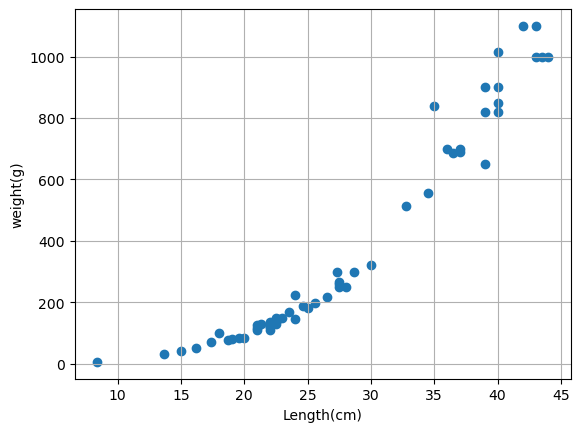

In [3]:
plt.figure() #도화지 한 장 준비

#perch_weight --> y
#산점도 scatter plot

plt.scatter(perch_length, perch_weight) #x좌푯값, y좌푯값
plt.grid()
plt.xlabel("Length(cm)")
plt.ylabel("weight(g)")
plt.show()

<h1>Chapter02 numpy를 이용한 데이터 전처리</h1>

In [5]:
print(type(perch_length)) #x 길이
print(type(perch_weight)) #y 무게
print(len(perch_length))

<class 'list'>
<class 'list'>
56


In [9]:
import numpy as np
x = np.array(perch_length)

In [10]:
y = np.array(perch_weight)

In [19]:
print(type(x), type(y)) ##ndarray = n-dimensinal array
print(x, y)
print(x.shape, y.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[ 8.4 13.7 15.  16.2 17.4 18.  18.7 19.  19.6 20.  21.  21.  21.  21.3
 22.  22.  22.  22.  22.  22.5 22.5 22.7 23.  23.5 24.  24.  24.6 25.
 25.6 26.5 27.3 27.5 27.5 27.5 28.  28.7 30.  32.8 34.5 35.  36.5 36.
 37.  37.  39.  39.  39.  40.  40.  40.  40.  42.  43.  43.  43.5 44. ] [   5.9   32.    40.    51.5   70.   100.    78.    80.    85.    85.
  110.   115.   125.   130.   120.   120.   130.   135.   110.   130.
  150.   145.   150.   170.   225.   145.   188.   180.   197.   218.
  300.   260.   265.   250.   250.   300.   320.   514.   556.   840.
  685.   700.   700.   690.   900.   650.   820.   850.   900.  1015.
  820.  1100.  1000.  1100.  1000.  1000. ]
(56,) (56,)


In [21]:
#데이터 분할
#1 학습용 데이터세트
#2 테스트용 데이터세트

from sklearn.model_selection import train_test_split
#데이터를 랜덤하게 섞음 -> 데이터 분할
#random_State? 난수->시드값을 지정(seed)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [22]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(42,) (14,)
(42,) (14,)


In [29]:
tmp = np.array([1,2,3,4,5,6])
print(tmp.shape)
tmp = tmp.reshape(6,1)
tmp

(6,)


array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [32]:
#데이터 전처리!
#(42, )(42, ) --> 1차원배열
#sklearn은 2차원 배열이 입력될 것을 기대하는 라이브러리
#1차워능ㄹ 2차원배열로
x_train = x_train.reshape(42,1)
x_test = x_test.reshape(14,1)
y_train = y_train.reshape(42,1)
y_test = y_test.reshape(14,1)

In [33]:
print(x_train.shape)

(42, 1)


## Chapter03 선형회귀

In [34]:
#모델생성

from sklearn.linear_model import LinearRegression
lr = LinearRegression() ##클래스 호출 lr 객체 생성!

#y = ax + b
# a = ? b = ?

lr.fit(x_train, y_train)

LinearRegression()

In [36]:
print(lr.predict([[31],[26]])) #1번 물고기 길이가 31 2번 물고기 길이가 26

[[500.51284892]
 [305.4271241 ]]


In [42]:
# y= w1x+ w2x + b
#a <---계수(coeffienct)
#b <-- y절편(y-intercept)
print(lr.coef_)
print(lr.intercept_)

[[39.01714496]]
[-709.01864495]


In [74]:
#plt.figure() #도화지 한 장 준비
#a = lr.coef_
#b = lr.intercept_
#perch_weight --> y
#산점도 scatter plot

#plt.scatter(x_train, y_train, color='g') #x좌푯값, y좌푯값
#plt.scatter([31,26],[500.51284892, 305.4271241])
#plt.plot([15, 50], [a * 15+b, a * 50 + b], color='r')
#plt.grid()
#plt.xlabel("Length(cm)")
#plt.ylabel("weight(g)")
#plt.show()

In [48]:
print(lr.score(x_test,y_test)) #결정계수값을 계산해서 반환해줌

0.8247503123313559


In [50]:
from sklearn.metrics import mean_absolute_error #MAE (평균절대오차)

y_pred = lr.predict(x_test) 
mae = mean_absolute_error(y_test,y_pred)#sum(|정답 - 예측값|)/N

print(mae) #0에 가까운 값일 수록 학습이 잘 된 모델이다.
# 예측값에는 평균적으로 약 94G정도의 오차를 가질 수 있다.

94.4612293798558


In [52]:
#과대적합과 과소적합 이해하기
print(lr.score(x_train,y_train)) #학습용 데이터 R^2 값
print(lr.score(x_test,y_test)) # 테스트용 데이터 R^2 값

0.9398463339976041
0.8247503123313559


In [55]:
## **Chapter 04. 다항회귀

In [71]:
x_train_poly = np.column_stack((x_train ** 2, x_train))
x_test_poly = np.column_stack((x_test ** 2, x_test))
print(x_train_poly.shape)
print(x_train_poly)

(42, 2)
[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]
 [ 625.     25.  ]
 [1600.     40.  ]
 [1521.     39.  ]
 [1849.     43.  ]
 [ 484.     22.  ]
 [ 400.     20.  ]
 [ 484.     22.  ]
 [ 576.     24.  ]
 [ 756.25   27.5 ]
 [1849.     43.  ]
 [1600.     40.  ]
 [ 576.     24.  ]
 [ 441.     21.  ]
 [ 756.25   27.5 ]
 [1600.     40.  ]
 [1075.84   32.8 ]
 [ 702.25   26.5 ]
 [1332.25   36.5 ]
 [ 187.69   13.7 ]
 [ 515.29   22.7 ]
 [ 225.     15.  ]
 [1369.     37.  ]
 [1225.     35.  ]
 [ 823.69   28.7 ]
 [ 552.25   23.5 ]
 [1521.     39.  ]
 [ 441.     21.  ]
 [ 529.     23.  ]
 [ 484.     22.  ]
 [1936.     44.  ]
 [ 506.25   22.5 ]
 [ 361.     19.  ]
 [1369.     37.  ]
 [ 484.     22.  ]
 [ 655.36   25.6 ]
 [1764.     42.  ]
 [1190.25   34.5 ]]


In [72]:
lr = LinearRegression()
lr.fit(x_train_poly, y_train)

LinearRegression()

In [73]:
print(lr.coef_)
print(lr.intercept_)

[[  1.01433211 -21.55792498]]
[116.05021078]


In [68]:
a = lr.coef_[0][0]
b = lr.coef_[0][1]
c = lr.intercept_

In [75]:
#plt.figure() #도화지 한 장 준비

#perch_weight --> y
#산점도 scatter plot
#x_pos = np.arrange(15,50,1)
#y_pos = a * (x_pos **2) + b * x_pos = c
#plt.scatter(x_train, y_train, color='green') #x좌푯값, y좌푯값

#plt.plot(x_pos, y_pos)

#plt.grid()
#plt.xlabel("Length(cm)")
#plt.ylabel("weight(g)")
#plt.show()

In [70]:
print(lr.score(x_train_poly, y_train))
print(lr.score(x_test_poly, y_test))

#시험 데이터 셋의 스코어가 더 좋음 그뜻은 과소적합 문제가 발생했다.

0.9706807451768623
0.9775935108325121


In [ ]:
#규제 (regularization) <--lecture 08주제
#1) 라쏘
#2) 릿지
#3) 엘라스틱 넷